In [1]:
import cv2
import matplotlib.pyplot as plt

config_file="C:\\Users\\nayak\\Downloads\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="C:\\Users\\nayak\\Downloads\\frozen_inference_graph.pb"

model = cv2.dnn_DetectionModel(frozen_model,config_file)

classLabels = []
file_name="C:\\Users\\nayak\\Downloads\\labels.txt"
with open(file_name,'rt')as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
print(classLabels)

print(len(classLabels))

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


< cv2.dnn.Model 0000017DECDC8E90>

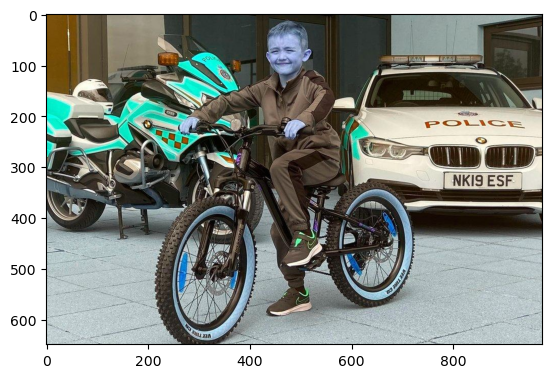

In [2]:
img = cv2.imread("C:\\Users\\nayak\\Downloads\\noahherringonhisnewbike.jpg")
plt.imshow(img)

[1 2 3 4]


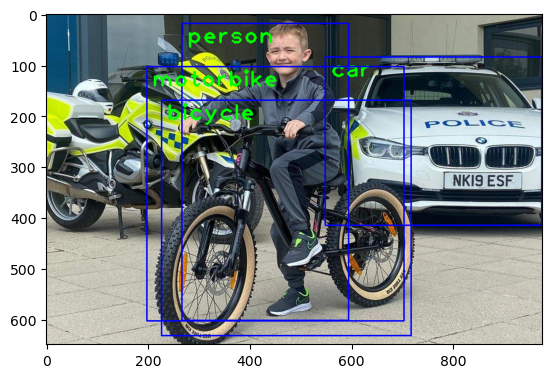

In [3]:
ClassIndex, confidece, bbox= model.detect(img, confThreshold= 0.5)
print(ClassIndex)

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture("C:\\Users\\nayak\\Downloads\\5330833-hd_1920_1080_30fps.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open')
    
font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox= model.detect(frame, confThreshold= 0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)
                
    cv2.imshow('obj detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyallWindows()


In [ ]:
#for web cam
#cap = cv2.VideoCapture(1)
#for video
#cap = cv2.VideoCapture("C:\\Users\\nayak\\Downloads\\5330833-hd_1920_1080_30fps.mp4")